# 1. Settings

In [20]:
# Label range
label = 'label_group'

# Sample size
sample_size = 500 #max 527

# Label mappings
label_group_dict = { 0: 0,
                     1: 'chapter',
                     2: 'company',
                     3: 'directive',
                     4: 'signal',
                     5: 'subchapter',
                     6: 'usecase_con',
                     7: 'usecase_pro',
                     8: 'version'}

date_dict = {0: 0,
             1: 'oldversiondate',
             2: 'validdate'
             3: 'printdate',
             4: 'revisiondate'}

# Feature Groups
ort_col = ['doc', 'Page', 'word', 'label', 'label_dum']
labels = ['chapter', 'subchapter', 'version', 'directive', 'signal', 'chem', 'company', 'date', 'date_oldversiondate', 'date_printdate', 'date_revisiondate', 'date_validdate', 'usecase', 'usecase_con', 'usecase_pro']
paper_feature = ['word.is.lower', 'word.is.upper', 'word.is.mixed.case', 'word.is.digit', 'word.contains.digit', 'word.is.special.char','word.len.1', 'word.len.3', 'word.len.5', 'word.len.7', 'word.len.9', 'word.len.11', 'word.len.13', 'word.is.stop']
date_specific_feature = ['word.is.print.date.trigger', 'word.is.revision.date.trigger', 'word.is.valid.date.trigger', 'word.is.oldversion.date.trigger']
new_feature = ['word.is.title', 'word.is.bold', 'word.is.newline','ycord_average','Xcord_first', 'grid.area_11', 'grid.area_12', 'grid.area_13', 'grid.area_14', 'grid.area_15', 'grid.area_16', 'grid.area_17', 'grid.area_18', 'grid.area_21', 'grid.area_22', 'grid.area_23', 'grid.area_24', 'grid.area_25', 'grid.area_26', 'grid.area_27', 'grid.area_28', 'grid.area_31', 'grid.area_32', 'grid.area_33', 'grid.area_34', 'grid.area_35', 'grid.area_36', 'grid.area_37', 'grid.area_38', 'grid.area_41', 'grid.area_42', 'grid.area_43', 'grid.area_44', 'grid.area_45', 'grid.area_46', 'grid.area_47', 'grid.area_48', 'is.page.1', 'is.page.2', 'is.page.3']

# Feature range
features_start = 'word.is.lower'
features_end = '+6_is.page.3'

# 2. Imports

In [3]:
# Models
from sklearn.svm import LinearSVC #SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
# Other Packages
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.externals import joblib
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

/Users/adrian/coding/rtbda_seminar/rtbda_venv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 3. Load data

In [ ]:
data =  pd.read_pickle('../data_model_allfeatw13_3_web3.pkl')
data

In [ ]:
list (data.columns.values)

# 4. Sample Data

In [19]:
# Create Dataframe of unique docs to use sample function from pandas with random state
docs = pd.DataFrame(data.doc.unique())
random_docs = docs[0].sample(n=sample_size, random_state=1).values.tolist()

In [21]:
data_sample = data[data['doc'].isin(random_docs)]

In [22]:
data_sample1 = data_sample.loc[:, 'doc':'usecase_pro']
data_sample2 = data_sample.loc[:, 'word.is.lower':'+6_is.page.3']

In [23]:
# Replace missing values
data_sample2 = data_sample2.fillna(data_sample2.mode().iloc[0])

In [24]:
data_sample = pd.concat([data_sample1, data_sample2], axis=1, sort=False)

# 5. Split Data

In [25]:
# Split random_docs in test and training sets
docs_train, docs_test = train_test_split(random_docs, random_state=1)
print('Anzahl Trainingsdaten:',len(docs_train))
print('Anzahl Testdaten:',len(docs_test))

Anzahl Trainingsdaten: 375
Anzahl Testdaten: 125


In [26]:
# Split random_data in test and training sets
train, test = data_sample[data_sample['doc'].isin(docs_train)], data_sample[data_sample['doc'].isin(docs_test)]

In [27]:
# Separate random_data training/test split in features and labels
x_train = train.loc[:, features_start:features_end]
x_test = test.loc[:, features_start:features_end]
y_train = train.loc[:, label]
y_test = test.loc[:, label]

In [28]:
x_train.shape, y_train.shape

((520734, 754), (520734,))

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')

x_sm, y_sm = smote.fit_sample(x_train, y_train)
x_sm.shape, y_sm.shape

((1000689, 754), (1000689,))

In [92]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

# 6. Train model

In [30]:
start = timer()
clf = RandomForestClassifier(verbose=1)
#clf.fit (x_train, y_train)
clf.fit(x_sm, y_sm)
y_pred = clf.predict(x_test)
end = timer()
print('Seconds for training:', end - start)

# Output a pickle file for the model
#joblib.dump(clf, 'saved_model.pkl') 
# Load the pickle file
#clf_load = joblib.load('saved_model.pkl') 

/Users/adrian/coding/rtbda_seminar/rtbda_venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Seconds for training: 303.534376331


# 7. Evaluate model

In [31]:
# Use sckit classification report for showing accuracy
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      5742
           2       0.97      0.94      0.96       703
           3       0.99      0.97      0.98       279
           4       1.00      0.91      0.95       103
           5       0.99      0.99      0.99      5784
           6       0.99      0.96      0.97       987
           7       0.50      0.86      0.63         7
           8       1.00      0.97      0.98       292

    accuracy                           0.99     13897
   macro avg       0.93      0.95      0.93     13897
weighted avg       0.99      0.99      0.99     13897



In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[25071,     0,     1, ...,     0,     0,     0],
       [   26,    13,     0, ...,     0,     0,     0],
       [   10,     1,     4, ...,     0,     0,     0],
       ...,
       [    8,     0,     0, ...,     0,     0,     0],
       [    2,     0,     0, ...,     0,     0,     0],
       [    3,     0,     0, ...,     0,     0,     0]])

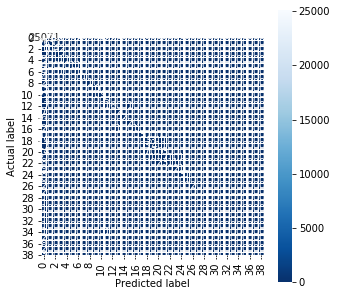

In [32]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.2, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
#plt.title(all_sample_title, size = 15);

In [32]:
res = pd.concat([pd.DataFrame(test.loc[:,'doc':'word']).reset_index(), pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame (y_pred).reset_index(drop=True)], axis=1, sort = False)

In [33]:
res[res[label]!=0]

,index,doc,Page,word,label_group,0
0,1118,002_sd.pdf,1.0,2015/830,3,3
1,1149,002_sd.pdf,1.0,ABSCHNITT,1,1
2,1150,002_sd.pdf,1.0,1,1,1
3,1151,002_sd.pdf,1.0,:,1,1
4,1152,002_sd.pdf,1.0,Bezeichnung,1,1
5,1153,002_sd.pdf,1.0,des,1,1
6,1154,002_sd.pdf,1.0,Stoffs,1,1
7,1155,002_sd.pdf,1.0,bzw,1,1
8,1156,002_sd.pdf,1.0,.,1,1
9,1157,002_sd.pdf,1.0,des,1,1


In [59]:
b[b.isna().any(axis=1)]

,0
